In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Read CSV File

In [6]:
Dataset = pd.read_csv('/content/sample_data/heart.csv')
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print(Dataset)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [8]:
Dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
Dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
pd.set_option("display.float", "{:.2f}".format)

In [11]:
Dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [12]:
Dataset.target.value_counts()

,count
target,
1,165
0,138


1 = With Heart Disease
<br>
0 = Without Heart Disease

,count
target,
1,165
0,138


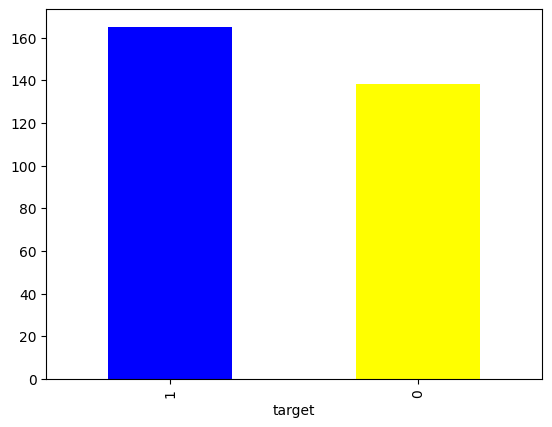

In [13]:
Dataset.target.value_counts().plot(kind="bar", color=["blue", "yellow"])
Dataset.target.value_counts()

### Normalizing Data

In [14]:
categorical_val = []
continous_val = []
for column in Dataset.columns:
    print('--------------------------------')
    print(f"{column} : {Dataset[column].unique()}")
    if len(Dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------------------
sex : [1 0]
--------------------------------
cp : [3 2 1 0]
--------------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276

In [15]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

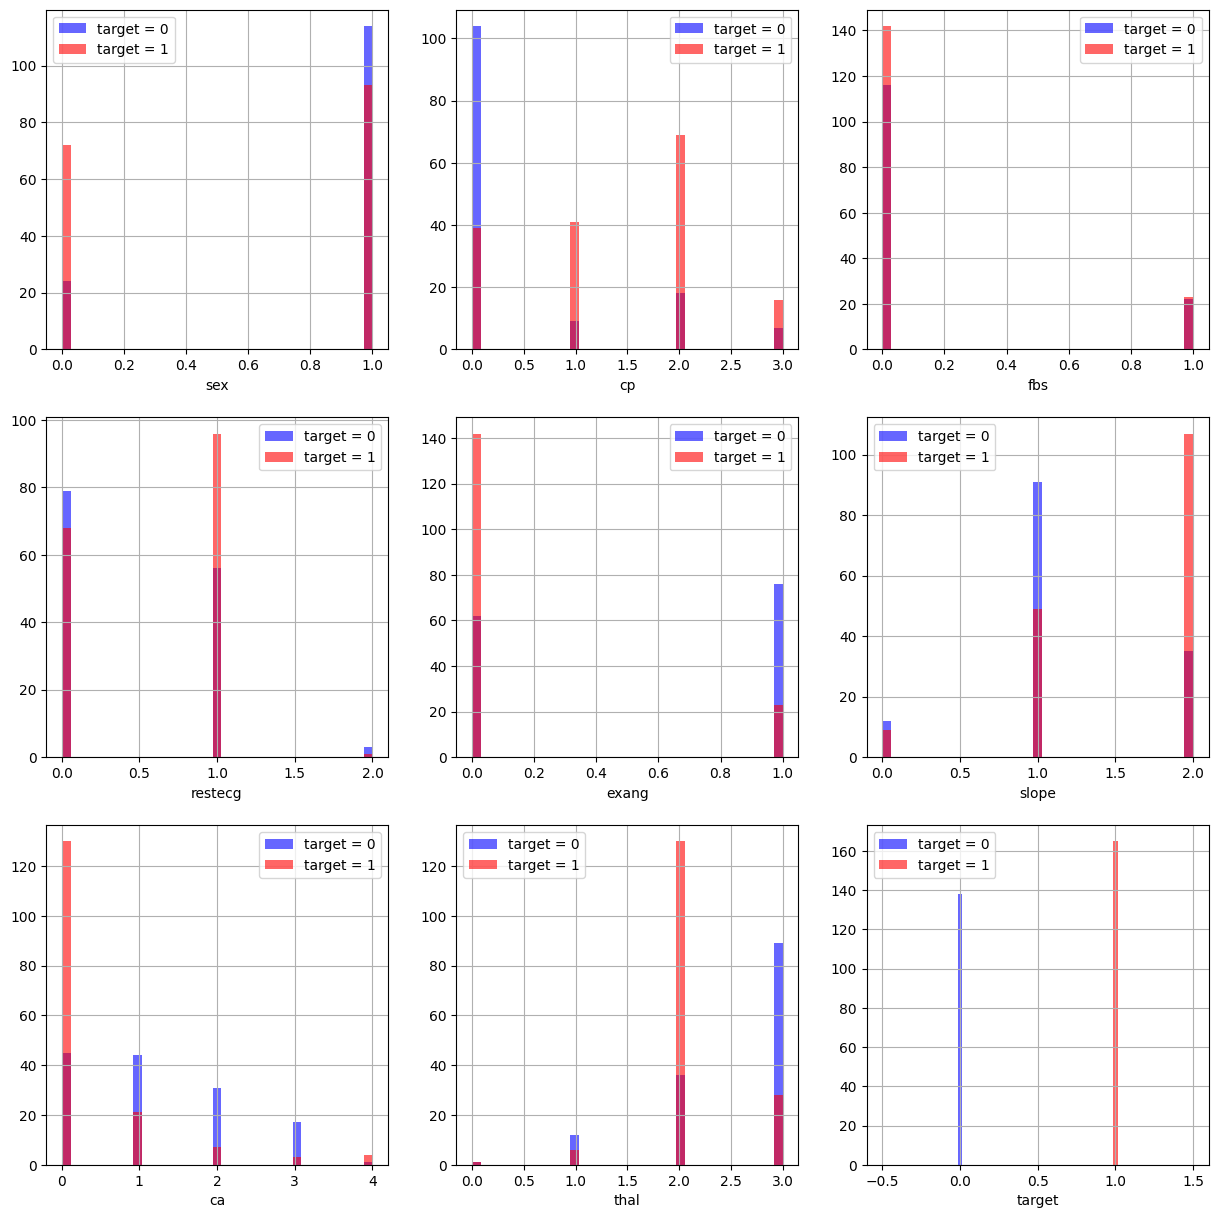

In [17]:
plt.figure(figsize=(15,15))
nCols = 3
nRows = -(-len(categorical_val) // nCols)
for i, column in enumerate(categorical_val, 1):
    plt.subplot(nCols, nRows, i)
    Dataset[Dataset["target"] == 0][column].hist(bins=35, color='blue', label='target = 0', alpha=0.6)
    Dataset[Dataset["target"] == 1][column].hist(bins=35, color='red', label='target = 1', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

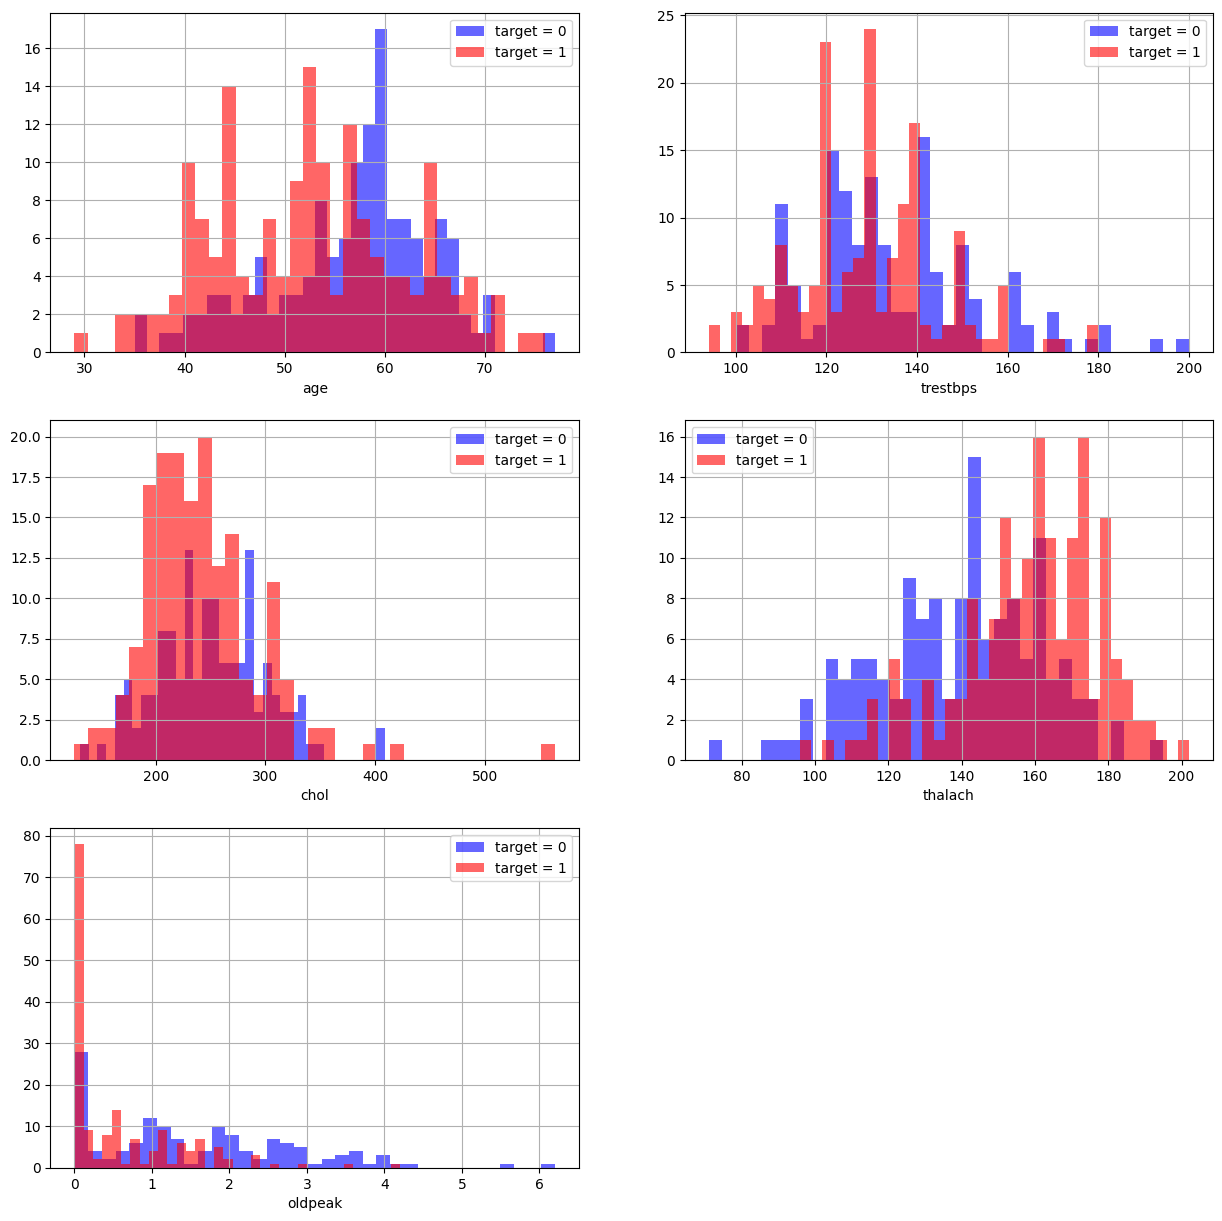

In [18]:
plt.figure(figsize=(15,15))
nCols = 3
nRows = -(-len(continous_val) // nCols)
for i, column in enumerate(continous_val, 1):
    plt.subplot(nCols, nRows, i)
    Dataset[Dataset["target"] == 0][column].hist(bins=35, color='blue', label='target = 0', alpha=0.6)
    Dataset[Dataset["target"] == 1][column].hist(bins=35, color='red', label='target = 1', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Age vs Max Heart Rate graph

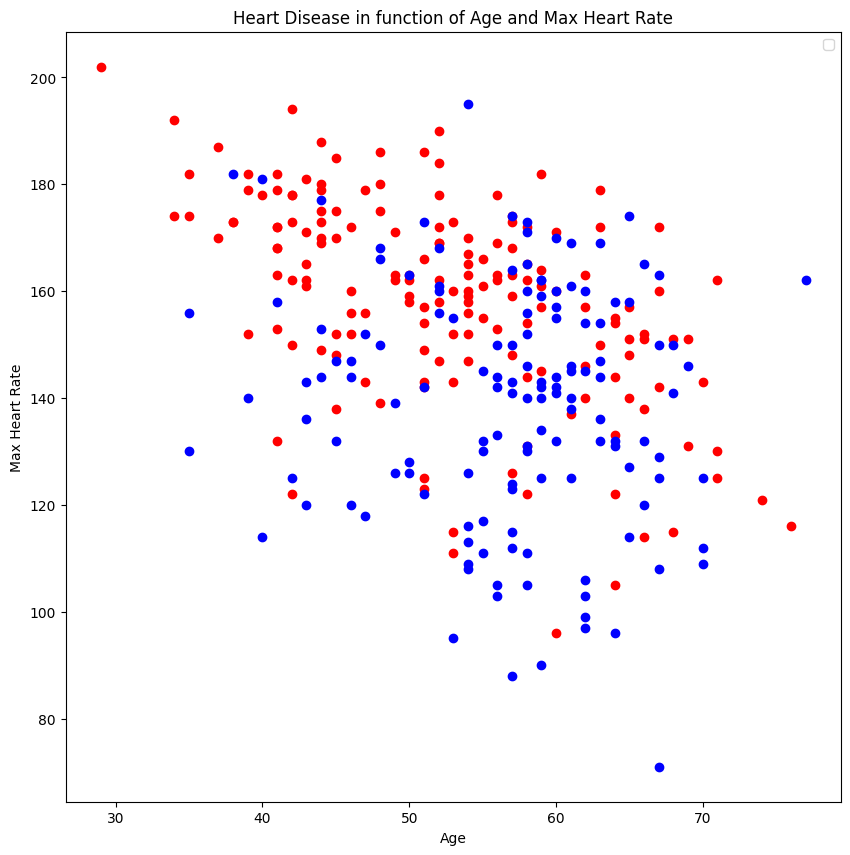

In [19]:
plt.figure(figsize=(10,10))

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.ylabel("Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])

plt.scatter(Dataset.age[Dataset.target==1], Dataset.thalach[Dataset.target==1], c='red')
plt.scatter(Dataset.age[Dataset.target==0], Dataset.thalach[Dataset.target==0], c='blue')

### Correlation

(14.5, -0.5)

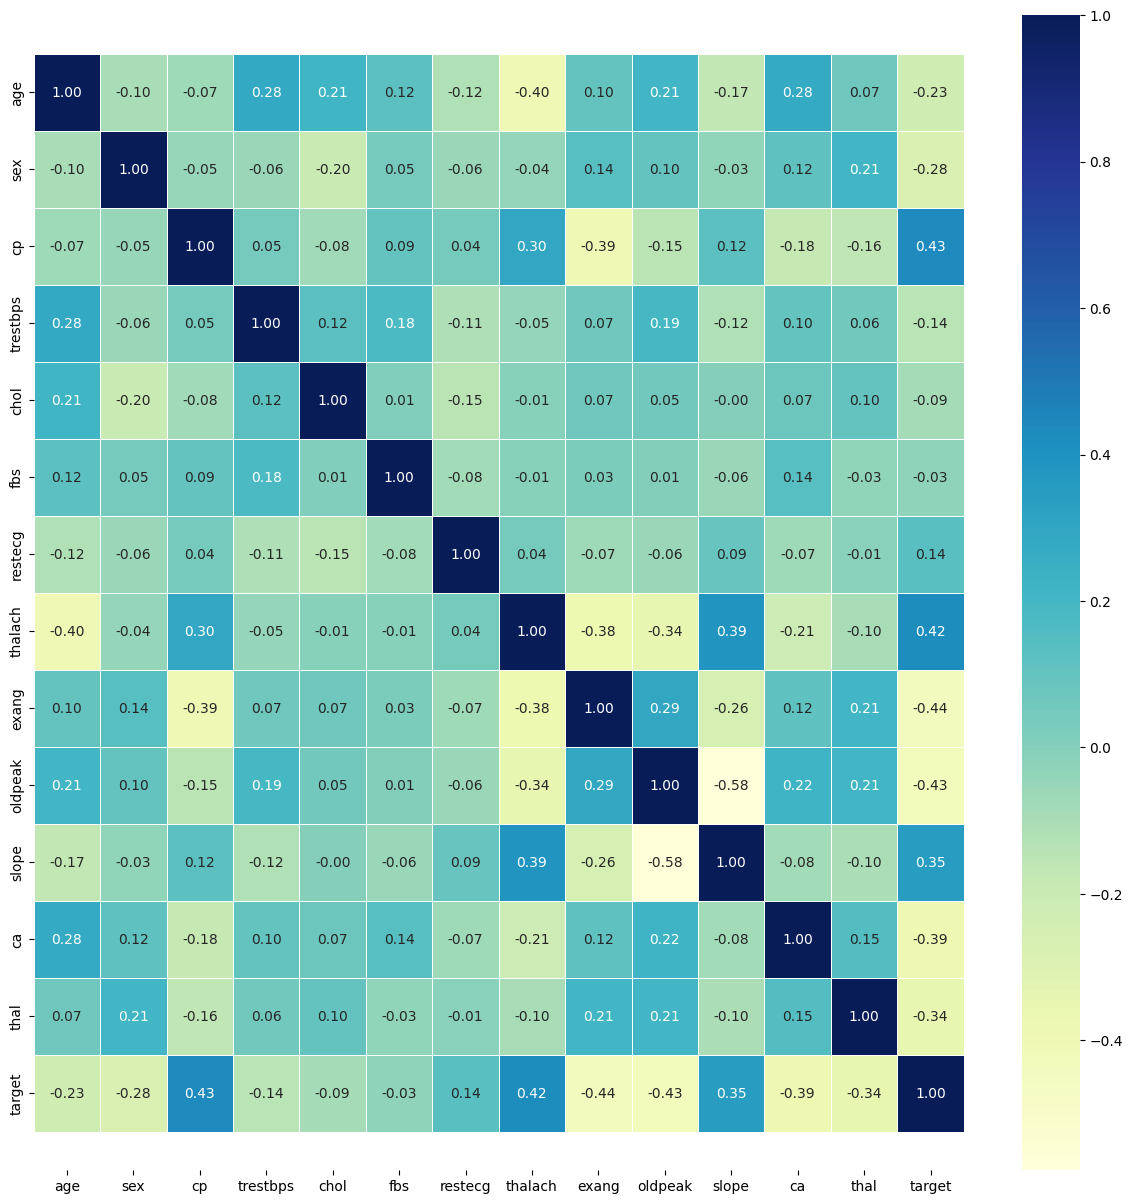

In [20]:
import seaborn as sns
corr_matrix = Dataset.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with target'}>

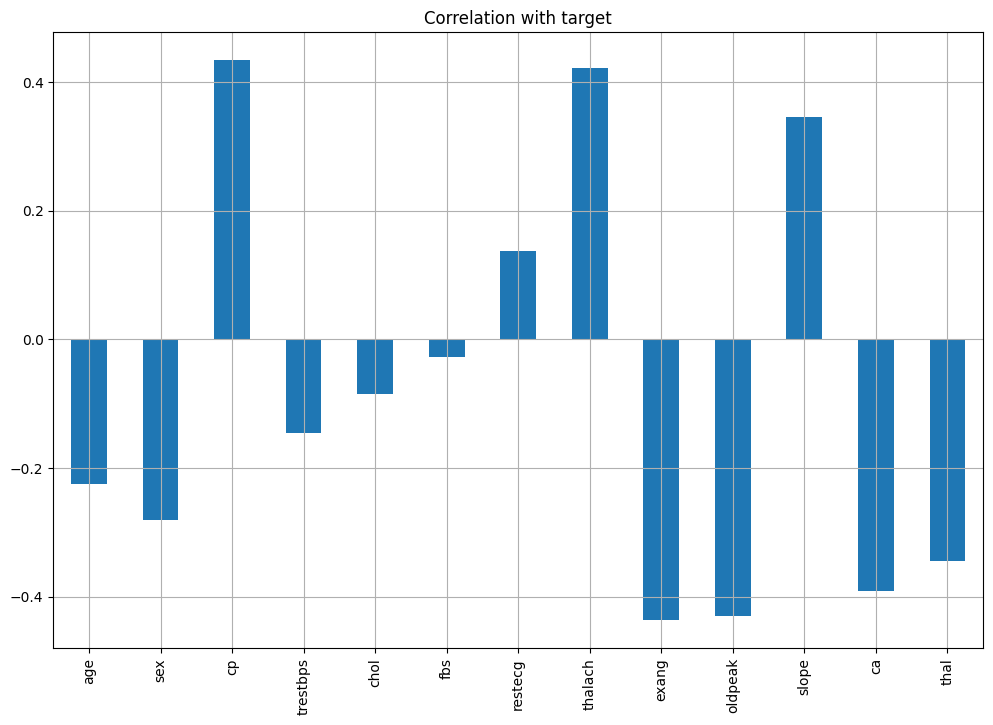

In [21]:
Dataset.drop('target', axis=1).corrwith(Dataset.target).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

In [22]:
categorical_val.remove('target')
df = pd.get_dummies(Dataset, columns= categorical_val)

In [23]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.50,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,41,130,204,172,1.40,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,56,120,236,178,0.80,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,57,120,354,163,0.60,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [24]:
print(Dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [25]:
from sklearn.preprocessing import StandardScaler

standardScalar = StandardScaler()

df[continous_val] = standardScalar.fit_transform(df[continous_val])

In [26]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.92,-0.09,0.07,1.63,2.12,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.47,-0.09,-0.82,0.98,0.31,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.18,-0.66,-0.20,1.24,-0.21,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.29,-0.66,2.08,0.58,-0.38,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [27]:
print(df)

      age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1   cp_0  \
0    0.95      0.76 -0.26     0.02     1.09       1  False   True  False   
1   -1.92     -0.09  0.07     1.63     2.12       1  False   True  False   
2   -1.47     -0.09 -0.82     0.98     0.31       1   True  False  False   
3    0.18     -0.66 -0.20     1.24    -0.21       1  False   True  False   
4    0.29     -0.66  2.08     0.58    -0.38       1   True  False   True   
..    ...       ...   ...      ...      ...     ...    ...    ...    ...   
298  0.29      0.48 -0.10    -1.17    -0.72       0   True  False   True   
299 -1.03     -1.23  0.34    -0.77     0.14       0  False   True  False   
300  1.50      0.71 -1.03    -0.38     2.04       0  False   True   True   
301  0.29     -0.09 -2.23    -1.52     0.14       0  False   True   True   
302  0.29     -0.09 -0.20     1.06    -0.90       0   True  False  False   

      cp_1  ...  slope_2   ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  \
0    Fal

## Machine Learning

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_forest = RandomForestClassifier(n_estimators=300, random_state=42)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[68  0]
 [ 0 83]]

Test Result:
Accuracy Score: 84.87%
_______________________________________________
Classification Report:	Precision Score: 87.34%
			Recall Score: 84.15%
			F1 score: 85.71%
_______________________________________________
Confusion Matrix: 
 [[60 10]
 [13 69]]



In [31]:
results_df = pd.DataFrame()

In [32]:
test_score = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
train_score = accuracy_score(y_train, rand_forest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest Classifier,100.00,84.87


### Gradient Boosting classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[68  0]
 [ 0 83]]

Test Result:
Accuracy Score: 73.68%
_______________________________________________
Classification Report:	Precision Score: 76.25%
			Recall Score: 74.39%
			F1 score: 75.31%
_______________________________________________
Confusion Matrix: 
 [[51 19]
 [21 61]]



In [35]:
test_score = accuracy_score(y_test, clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Gradient Boosting Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest Classifier,100.00,84.87
1,Gradient Boosting Classifier,100.00,73.68


### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=40).fit(X_train, y_train)

print_score(DTC, X_train, y_train, X_test, y_test, train=True)
print_score(DTC, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[68  0]
 [ 0 83]]

Test Result:
Accuracy Score: 76.32%
_______________________________________________
Classification Report:	Precision Score: 80.26%
			Recall Score: 74.39%
			F1 score: 77.22%
_______________________________________________
Confusion Matrix: 
 [[55 15]
 [21 61]]



In [37]:
test_score = accuracy_score(y_test, DTC.predict(X_test)) * 100
train_score = accuracy_score(y_train, DTC.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df,results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest Classifier,100.00,84.87
1,Gradient Boosting Classifier,100.00,73.68
2,Decision Tree Classifier,100.00,76.32


Graph

<Axes: xlabel='Model', ylabel='Training Accuracy %'>

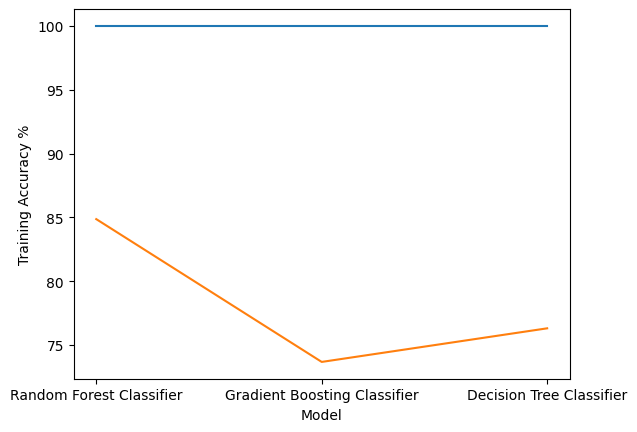

In [38]:
sns.lineplot(x = 'Model', y = 'Training Accuracy %', data = results_df)
sns.lineplot(x = 'Model', y = 'Testing Accuracy %', data = results_df)

<Axes: title={'center': 'Model Accuracy'}, xlabel='Model'>

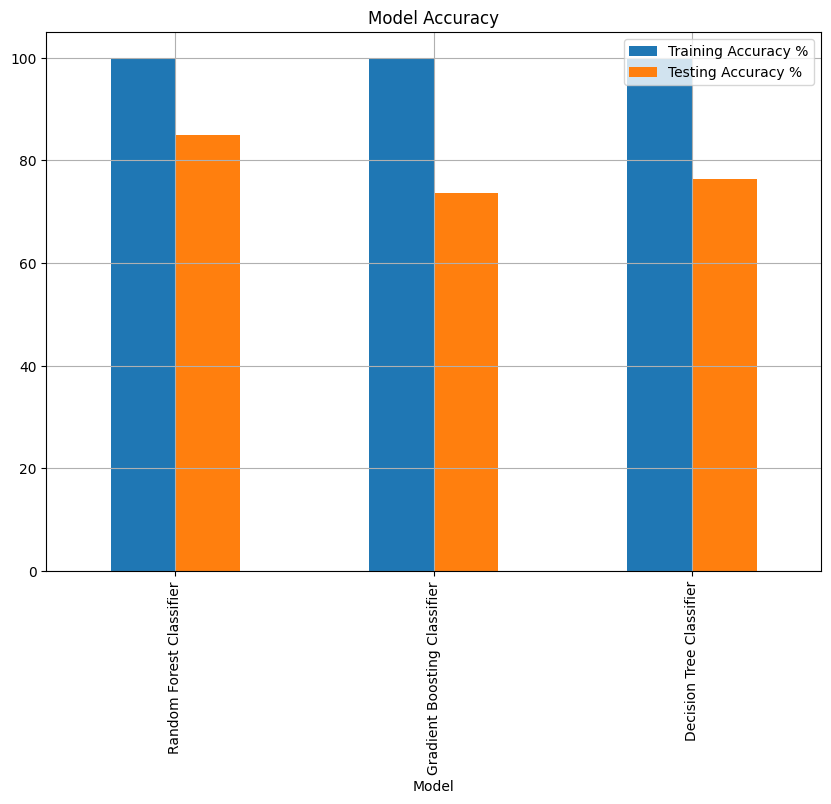

In [39]:
results_df.plot(kind='bar', x='Model', y=['Training Accuracy %', 'Testing Accuracy %'], title="Model Accuracy", grid=True, figsize=(10, 7))

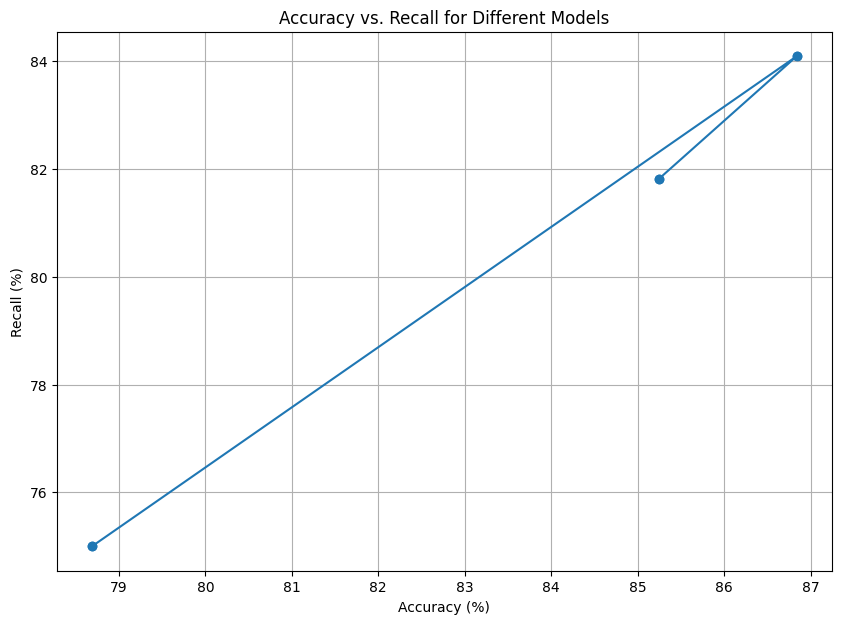

In [40]:
model_scores = {
    "Random Forest Classifier": {"accuracy": 85.25, "recall": 81.82},
    "Gradient Boosting Classifier": {"accuracy": 86.84, "recall": 84.09},
    "Decision Tree Classifier": {"accuracy": 78.69, "recall": 75.00},
}

model_names = list(model_scores.keys())

accuracy_scores = [model_scores[model]["accuracy"] for model in model_names]

recall_scores = [model_scores[model]["recall"] for model in model_names]

plt.figure(figsize=(10, 7))
plt.scatter(accuracy_scores, recall_scores)

plt.xlabel("Accuracy (%)")
plt.ylabel("Recall (%)")
plt.title("Accuracy vs. Recall for Different Models")

plt.grid(True)

plt.plot(accuracy_scores, recall_scores, '-o')

plt.show()

# Iteration 2

In [41]:
X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [42]:
rand_forest = RandomForestClassifier(n_estimators=300, random_state=42)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[14  0]
 [ 0 16]]

Test Result:
Accuracy Score: 78.75%
_______________________________________________
Classification Report:	Precision Score: 81.38%
			Recall Score: 79.19%
			F1 score: 80.27%
_______________________________________________
Confusion Matrix: 
 [[ 97  27]
 [ 31 118]]



In [43]:
test_score = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
train_score = accuracy_score(y_train, rand_forest.predict(X_train)) * 100

tap_df = pd.DataFrame()
tap_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tap_df = pd.concat([tap_df, tap_df_2], ignore_index=True)
tap_df

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest Classifier,100.00,78.75


In [44]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[14  0]
 [ 0 16]]

Test Result:
Accuracy Score: 69.60%
_______________________________________________
Classification Report:	Precision Score: 78.45%
			Recall Score: 61.07%
			F1 score: 68.68%
_______________________________________________
Confusion Matrix: 
 [[99 25]
 [58 91]]



In [45]:
test_score = accuracy_score(y_test, clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, clf.predict(X_train)) * 100

tap_df_2 = pd.DataFrame(data=[["Gradient Boosting Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tap_df = pd.concat([tap_df, tap_df_2], ignore_index=True)
tap_df

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest Classifier,100.00,78.75
1,Gradient Boosting Classifier,100.00,69.60


In [46]:
DTC = DecisionTreeClassifier(random_state=40).fit(X_train, y_train)

print_score(DTC, X_train, y_train, X_test, y_test, train=True)
print_score(DTC, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[14  0]
 [ 0 16]]

Test Result:
Accuracy Score: 57.88%
_______________________________________________
Classification Report:	Precision Score: 65.74%
			Recall Score: 47.65%
			F1 score: 55.25%
_______________________________________________
Confusion Matrix: 
 [[87 37]
 [78 71]]



In [47]:
test_score = accuracy_score(y_test, DTC.predict(X_test)) * 100
train_score = accuracy_score(y_train, DTC.predict(X_train)) * 100

tap_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tap_df = pd.concat([tap_df,tap_df_2], ignore_index=True)
tap_df

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest Classifier,100.00,78.75
1,Gradient Boosting Classifier,100.00,69.60
2,Gradient Boosting Classifier,100.00,69.60


<Axes: xlabel='Model', ylabel='Training Accuracy %'>

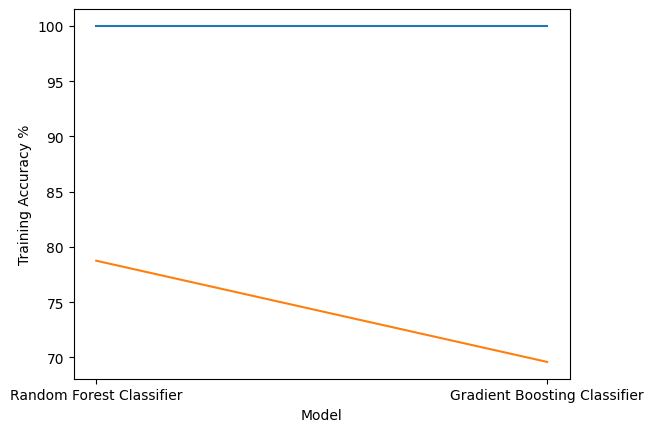

In [48]:
sns.lineplot(x = 'Model', y = 'Training Accuracy %', data = tap_df)
sns.lineplot(x = 'Model', y = 'Testing Accuracy %', data = tap_df)

<Axes: title={'center': 'Model Accuracy'}, xlabel='Model'>

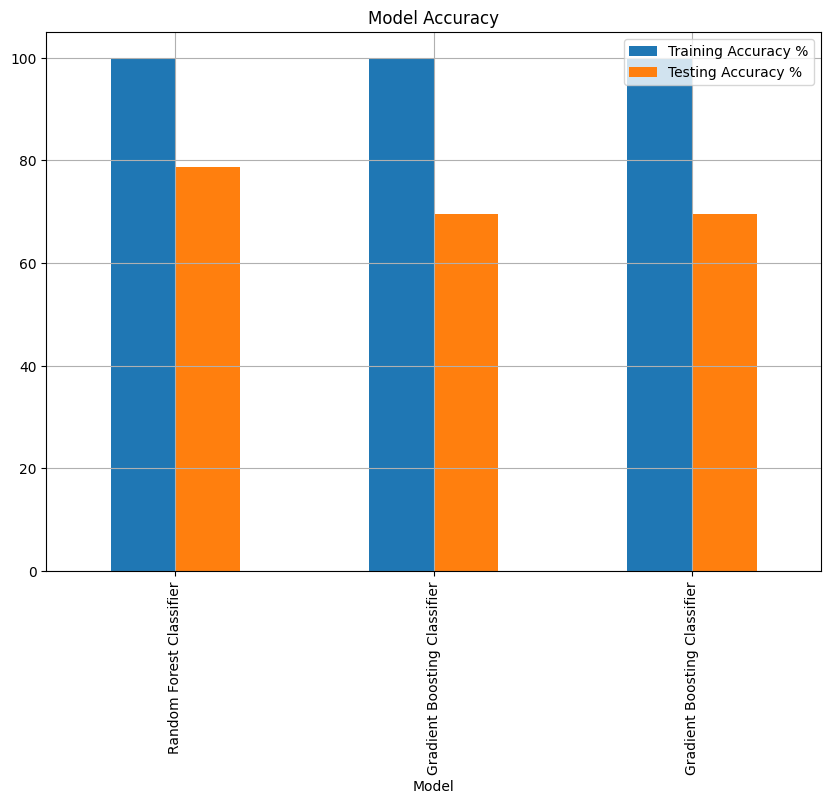

In [49]:
tap_df.plot(kind='bar', x='Model', y=['Training Accuracy %', 'Testing Accuracy %'], title="Model Accuracy", grid=True, figsize=(10, 7))

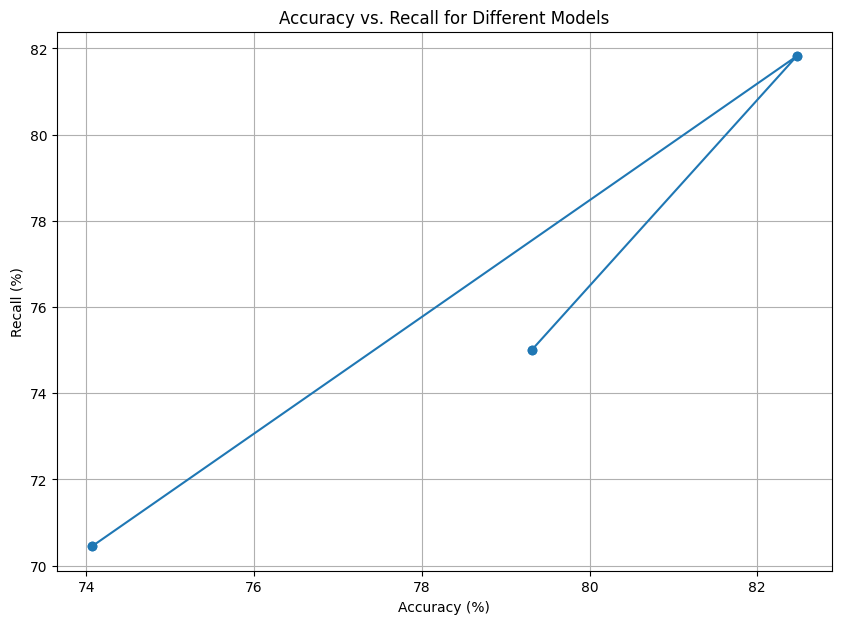

In [50]:
model_scores = {
    "Random Forest Classifier": {"accuracy": 79.31, "recall": 75.00},
    "Gradient Boosting Classifier": {"accuracy": 82.47, "recall": 81.82},
    "Decision Tree Classifier": {"accuracy": 74.07, "recall": 70.45},
}

model_names = list(model_scores.keys())

accuracy_scores = [model_scores[model]["accuracy"] for model in model_names]

recall_scores = [model_scores[model]["recall"] for model in model_names]

plt.figure(figsize=(10, 7))
plt.scatter(accuracy_scores, recall_scores)

plt.xlabel("Accuracy (%)")
plt.ylabel("Recall (%)")
plt.title("Accuracy vs. Recall for Different Models")

plt.grid(True)

plt.plot(accuracy_scores, recall_scores, '-o')

plt.show()


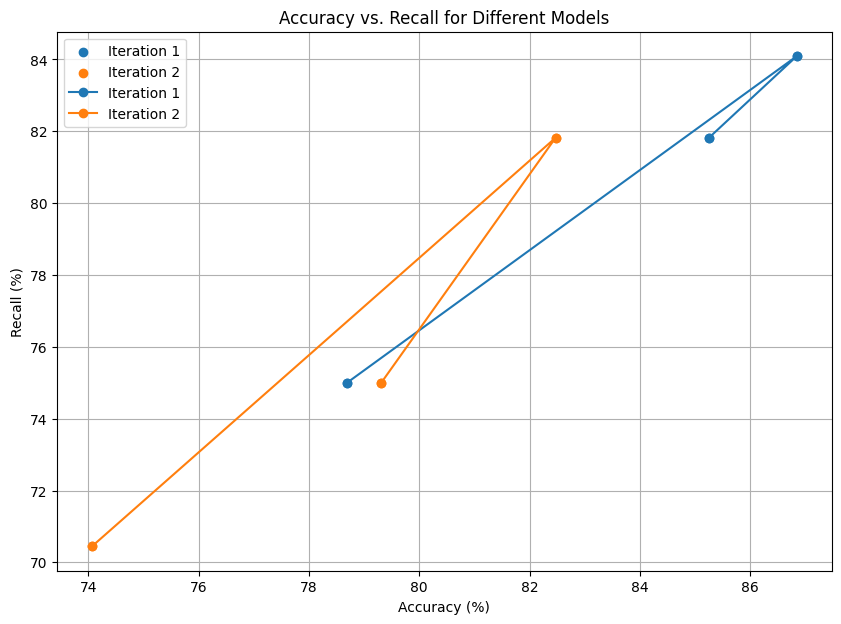

In [51]:
model_scores = {
    "Iteration 1": {
        "Random Forest Classifier": {"accuracy": 85.25, "recall": 81.82},
        "Gradient Boosting Classifier": {"accuracy": 86.84, "recall": 84.09},
        "Decision Tree Classifier": {"accuracy": 78.69, "recall": 75.00},
    },
    "Iteration 2": {
        "Random Forest Classifier": {"accuracy": 79.31, "recall": 75.00},
        "Gradient Boosting Classifier": {"accuracy": 82.47, "recall": 81.82},
        "Decision Tree Classifier": {"accuracy": 74.07, "recall": 70.45},
    },
}

model_names = list(model_scores["Iteration 1"].keys())

accuracy_scores_1 = [model_scores["Iteration 1"][model]["accuracy"] for model in model_names]
recall_scores_1 = [model_scores["Iteration 1"][model]["recall"] for model in model_names]

accuracy_scores_2 = [model_scores["Iteration 2"][model]["accuracy"] for model in model_names]
recall_scores_2 = [model_scores["Iteration 2"][model]["recall"] for model in model_names]

plt.figure(figsize=(10, 7))

plt.scatter(accuracy_scores_1, recall_scores_1, label="Iteration 1")
plt.scatter(accuracy_scores_2, recall_scores_2, label="Iteration 2")

plt.xlabel("Accuracy (%)")
plt.ylabel("Recall (%)")
plt.title("Accuracy vs. Recall for Different Models")

plt.grid(True)

plt.plot(accuracy_scores_1, recall_scores_1, '-o', label="Iteration 1")
plt.plot(accuracy_scores_2, recall_scores_2, '-o', label="Iteration 2")

plt.legend()

plt.show()


### User Data (50% Accuracy)

In [52]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Set the number of rows for your DataFrame
num_rows = 2000  # Adjust this as needed

# Generate random values for each column
random_values = {
    'age': np.random.randint(18, 80, num_rows),  # Generate random integers between 18 and 80 for age
    'sex': np.random.randint(0, 2, num_rows),     # Generate random integers (0 or 1) for sex
    'cp': np.random.randint(0, 4, num_rows),      # Generate random integers between 0 and 3 for cp
    'trestbps': np.random.randint(90, 200, num_rows),  # Generate random integers between 90 and 200 for trestbps
    'chol': np.random.randint(120, 350, num_rows),    # Generate random integers between 120 and 350 for chol
    'fbs': np.random.randint(0, 2, num_rows),         # Generate random integers (0 or 1) for fbs
    'restecg': np.random.randint(0, 3, num_rows),     # Generate random integers between 0 and 2 for restecg
    'thalach': np.random.randint(60, 220, num_rows),  # Generate random integers between 60 and 220 for thalach
    'exang': np.random.randint(0, 2, num_rows),       # Generate random integers (0 or 1) for exang
    'oldpeak': np.random.uniform(0, 6, num_rows),     # Generate random floats between 0 and 6 for oldpeak
    'slope': np.random.randint(0, 3, num_rows),       # Generate random integers between 0 and 2 for slope
    'ca': np.random.randint(0, 5, num_rows),          # Generate random integers between 0 and 4 for ca
    'thal': np.random.randint(0, 4, num_rows),         # Generate random integers between 0 and 3 for thal
    'target': np.random.randint(0, 2, num_rows)
}

# Create DataFrame
user_data = pd.DataFrame(random_values, columns=columns)

# Display the user data
print("User-generated data:")
print(user_data)

User-generated data:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      35    0   3       198   146    1        2      208      1     0.05   
1      43    0   0       109   218    1        0      191      1     1.86   
2      52    0   2       142   229    1        1       61      1     4.85   
3      24    0   2       183   304    1        2      207      1     5.46   
4      25    0   0       161   345    0        2      122      0     5.52   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1995   37    0   0       166   333    0        1      192      1     2.91   
1996   43    0   3       191   337    1        1      166      0     2.05   
1997   41    1   1       164   165    0        1       83      0     1.99   
1998   72    1   1       182   308    0        0       95      0     1.10   
1999   74    0   1       153   120    1        0       68      0     5.02   

      slope  ca  thal  target  
0         1   2     2 

In [53]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2000 non-null   int64  
 1   sex       2000 non-null   int64  
 2   cp        2000 non-null   int64  
 3   trestbps  2000 non-null   int64  
 4   chol      2000 non-null   int64  
 5   fbs       2000 non-null   int64  
 6   restecg   2000 non-null   int64  
 7   thalach   2000 non-null   int64  
 8   exang     2000 non-null   int64  
 9   oldpeak   2000 non-null   float64
 10  slope     2000 non-null   int64  
 11  ca        2000 non-null   int64  
 12  thal      2000 non-null   int64  
 13  target    2000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 218.9 KB


In [54]:
X = user_data.drop('target', axis=1)
y = user_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=6)

In [55]:
User_rand_forest = RandomForestClassifier(n_estimators=300, random_state=42)
User_rand_forest.fit(X_train, y_train)

print_score(User_rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(User_rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[510   0]
 [  0 490]]

Test Result:
Accuracy Score: 49.50%
_______________________________________________
Classification Report:	Precision Score: 49.56%
			Recall Score: 44.51%
			F1 score: 46.90%
_______________________________________________
Confusion Matrix: 
 [[272 227]
 [278 223]]

